In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100
bounds = 50
order = 6
robust = True
njobs = 24

In [2]:
%matplotlib inline
df = pd.read_csv('SimStockData2.csv', index_col=0)
last = df.shift(1)
cols = df.columns

df = (df / last).dropna()  # Convert to returns

In [3]:
y = df[cols]
titles = {i + 1: stock for i, stock in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=bounds, order=order, robust=robust, njobs=njobs)
rs = recon.unmeasured(y.values, plot=True, titles=titles)

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.404 Seconds
Building M ...
	Done. Took 4.506 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 365 iterations
	Done. Took 33.005 Seconds
Extracting Qis ...
	Done. Took 0.007 Seconds
Learning Convolution for Q(1,2) ...
Learning Convolution for Q(1,3) ...
Learning Convolution for Q(1,4) ...
Learning Convolution for Q(1,5) ...
Learning Convolution for Q(1,6) ...
Learning Convolution for Q(1,7) ...
Learning Convolution for Q(1,8) ...
Learning Convolution for Q(1,10) ...
Learning Convolution for Q(1,9) ...
Learning Convolution for Q(2,1) ...
Learning Convolution for Q(2,3) ...
Learning Convolution for Q(2,4) ...
Learning Convolution for Q(2,5) ...
Learning Convolution for Q(2,6) ...
Learning Convolution for Q(2,7) ...
Learning Convolution for Q(2,8) ...
Learning Convolution for Q(2,9) ...
Learning Convolution for Q(2,10) ...
Learning Con

In [5]:
flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))
        
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('magnitudes([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

magnitudes([-12.8911779005 0.125919834581 2.60008084844 0.0253005826674 6.99377460614 0.114270224608 -21.7266906665 0.0463755781649 19.0544259725 0.0898757002583 0.571423866544 0.0932776976558 ; 30.9106274852 0.0111933446305 -2.28741962845 -0.0907414578353 -17.0306734044 0.0369225663582 1.67242723083 -0.000554004760135 -1.00053600887 0.0844558570732 10.8629984918 0.0147920826476 ; -1.87552769493 0.020117460235 -0.949424763381 -0.0812520104317 6.39127958925 -0.0230230814156 38.1855603428 -0.00494496077157 5.98810004725 0.0215524154483 -0.905697211231 -0.00882651139976 ; -12.8909495668 0.0985786467894 2.60032912219 0.0403183426393 6.99399206217 0.113895019494 -21.7263746355 0.0252626327392 19.0546785726 0.0454269294554 0.571668404145 0.0920319971245 ; -12.8909495668 0.0985786467894 2.60032912219 0.0403183426393 6.99399206217 0.113895019494 -21.7263746355 0.0252626327392 19.0546785726 0.0454269294554 0.571668404145 0.0920319971245 ; -12.8909678147 0.098798593062 2.6003336472 0.04004972155

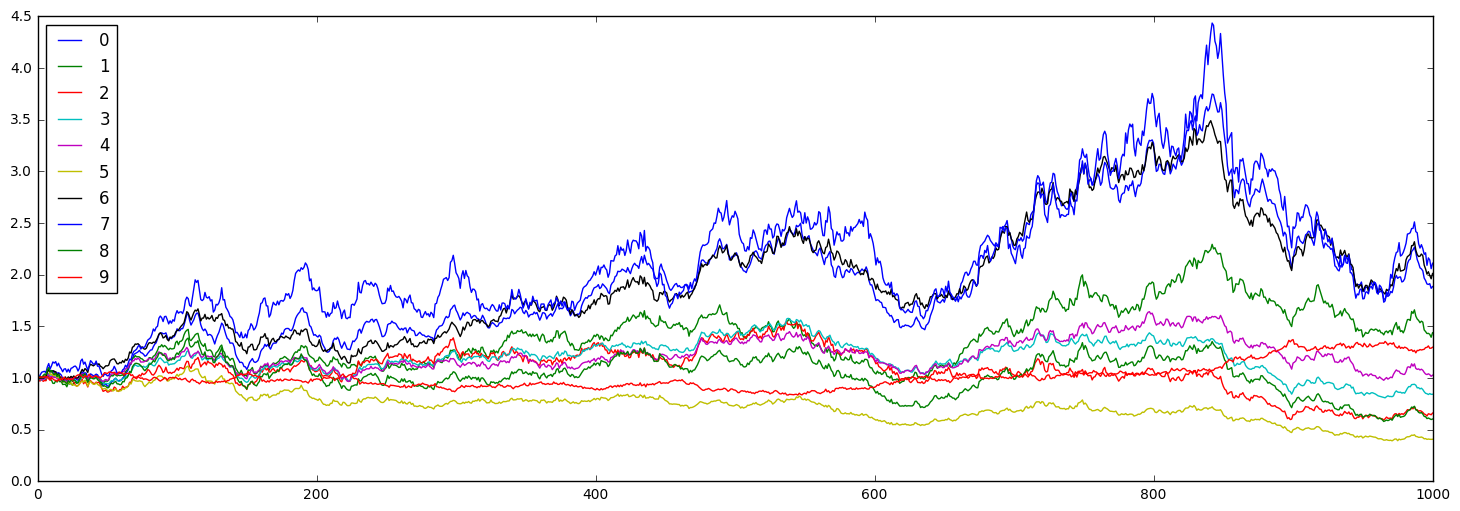

In [4]:
%matplotlib inline
df.plot(figsize=(18,6))